In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

In [35]:
column_names = ['user_id','movie_id','rating','rating_time']
users = pd.read_csv('./ml-100k/u.data',sep='\t',names=column_names)
print(users)
print(users.shape)

       user_id  movie_id  rating  rating_time
0          196       242       3    881250949
1          186       302       3    891717742
2           22       377       1    878887116
3          244        51       2    880606923
4          166       346       1    886397596
...        ...       ...     ...          ...
99995      880       476       3    880175444
99996      716       204       5    879795543
99997      276      1090       1    874795795
99998       13       225       2    882399156
99999       12       203       3    879959583

[100000 rows x 4 columns]
(100000, 4)


In [36]:
import pandas as pd

# Read movie information from the "u.item" file
with open('./ml-100k/u.item', 'r') as item_file:
    item_data = item_file.read()

lines = item_data.strip().split('\n')
df = pd.DataFrame([line.split('|')[:2] for line in lines], columns=['movie_id', 'title'])

# Export the first two columns to another CSV file
df.to_csv('./ml-100k/movie_id_title.csv', index=False)


In [37]:
movies = pd.read_csv('./ml-100k/movie_id_title.csv')
print(movies.shape)
movies.head()

(1682, 2)


,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [38]:
df = pd.merge(users,movies,on='movie_id')
df 

,user_id,movie_id,rating,rating_time,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


<h1>Exploratory Data Analysis</h1>

In [39]:
df.groupby('title').agg({'rating':'mean'}).sort_values(by='rating',ascending=False).head(15)

,rating
title,
They Made Me a Criminal (1939),5.000
Marlene Dietrich: Shadow and Light (1996),5.000
"Saint of Fort Washington, The (1993)",5.000
Someone Else's America (1995),5.000
Star Kid (1997),5.000
"Great Day in Harlem, A (1994)",5.000
Aiqing wansui (1994),5.000
Santa with Muscles (1996),5.000
Prefontaine (1997),5.000


In [40]:
result = df.groupby('title')['rating'].count().sort_values(ascending=False)
result = result.reset_index() 
result

,title,rating
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
...,...,...
1659,"Great Day in Harlem, A (1994)",1
1660,"Other Voices, Other Rooms (1997)",1
1661,Good Morning (1971),1
1662,Girls Town (1996),1


In [41]:
ratings = pd.DataFrame(df.groupby('title')
['rating'].mean())
ratings.head()

ratings['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,rating_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Text(0, 0.5, 'Count of Rating')

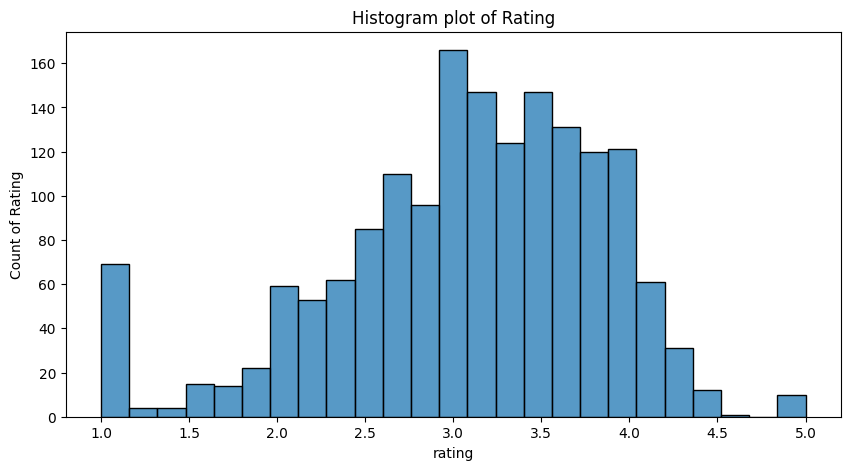

In [42]:
plt.figure(figsize=(10,5))
sbs.histplot(ratings['rating'])
plt.title('Histogram plot of Rating')
plt.xlabel('rating')
plt.ylabel('Count of Rating')

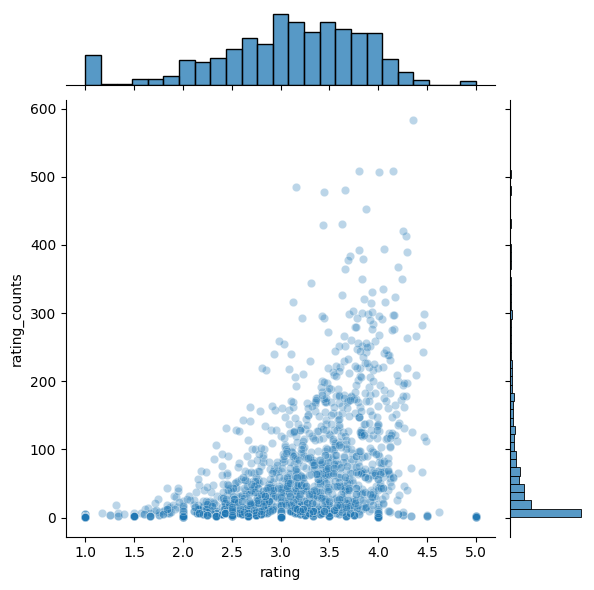

In [43]:
sbs.jointplot(x='rating',y='rating_counts',data=ratings,alpha=0.3)

In [44]:
movies_reco= df.pivot_table(index='user_id', columns='title',values='rating')
movies_reco.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,ï¿½ kï¿½ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [45]:
starwars_user_ratings = movies_reco['Star Wars (1977)']
starwars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [46]:
# Finding the similar movies from pivot_table
similar_starwars= movies_reco.corrwith(starwars_user_ratings)
# Making data frame with columns correlation
corr_starwars = pd.DataFrame(similar_starwars,columns=['Correlation'])
# Droping the nan values 
corr_starwars.dropna(inplace=True)
#combining the no of users watched that movies
corr_starwars= corr_starwars.join(ratings['rating_counts'])
# Cosidering more than 100 users watched that movies
corr_starwars[corr_starwars['rating_counts']>100].sort_values(by='Correlation',ascending=False).head()

f:\movie-recommendation-system\.venv\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
f:\movie-recommendation-system\.venv\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,rating_counts
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [47]:
movies_df= df.pivot_table(index="title",columns='user_id',values='rating').fillna(0)
movies_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from scipy.sparse import csr_matrix

# Now converting into metrix
movies_df_metrix= csr_matrix(movies_df.values) 

In [49]:
# Here we are going to cosine simalirity 
from sklearn.neighbors import NearestNeighbors

# Building the model
model_knn= NearestNeighbors(metric= 'cosine', algorithm='brute')

# Fitting the model 
model_knn.fit(movies_df_metrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [50]:
# Shape[0]---> selecting from rows
select_random_movies= np.random.choice(movies_df.shape[0])
select_random_movies
# Now we will try to find the movies related to select_random_movies
distances, indices = model_knn.kneighbors(movies_df.iloc[select_random_movies,:].values.reshape(1,-1), n_neighbors= 6)

In [51]:
#Here 0---> recomendation for same movies

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movies_df.index[select_random_movies])) # For which movies it selected
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movies_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for unknown:

1: Mighty Morphin Power Rangers: The Movie (1995), with distance of 0.5830715881714656:
2: Killer (Bulletproof Heart) (1994), with distance of 0.6147915303991465:
3: Jaws 3-D (1983), with distance of 0.6321044318753226:
4: Bushwhacked (1995), with distance of 0.6973862336655988:
5: Raw Deal (1948), with distance of 0.7226499018873855:
